# DATA 620, Assignment 4: High Frequency Words

# **Team 3 - Rafal Decowski, Tze Fung Lung, Yun Mai, Ahsanul Choudhury**

## Assignment – High Frequency Words

Please answer the following questions in an IPython Notebook, posted to GitHub.
1. Choose a corpus of interest.
2. How many total unique words are in the corpus? (Please feel free to define unique words in any interesting, defensible way).
3. Taking the most common words, how many unique words represent half of the total words in the corpus?
4. Identify the 200 highest frequency words in this corpus.
5. Create a graph that shows the relative frequency of these 200 words.
6. Does the observed relative frequency of these words follow Zipf’s law? Explain.
7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

In [1]:
# Import library
import urllib2
import nltk, re, pprint
from nltk import word_tokenize
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

##  1 Choose a corpus of interest
For this study of high frequency words using NLTK to download All along the River. This text is available from Project Gutenberg and we access the file using the link in the code below.

In [2]:
url = 'https://www.gutenberg.org/files/57405/57405-0.txt'
response = urllib2.urlopen(url)

raw = response.read().decode('utf8')

In [3]:
# Total characters
total_words = len(raw)
total_words

675065

In [4]:
# First 120 characters
raw[:120]

u'\ufeffThe Project Gutenberg EBook of All along the River, by Mary Elizabeth Braddon\r\n\r\nThis eBook is for the use of anyone an'

### Identify the corpus text, Tokenization
Project Gutenberg texts contain extra data in the header and footer of the text. We need to limit the corpus to just the text of the book and do so with the code below. This must be done by hand since each book has a slightly different header and footer text.

Token - Each word is a token when a sentence is "tokenized" into words.

The find() and rfind() ("reverse find") methods help us get the right index values to use for slicing the string.

In [5]:
# Find the strings
raw.find("CHAPTER I")

3624

In [6]:
raw.rfind("THE END")

653905

In [7]:
# Group certain strings
raw = raw[3614:653895]

In [8]:
nltk.download('punkt')
tokens = word_tokenize(raw)

words = [w for w in tokens if w.isalpha()]
words = [w.lower() for w in words]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ahsan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
tokens[:10]

[u'CHAPTER',
 u'I',
 u'.',
 u'``',
 u'THE',
 u'RAIN',
 u'SET',
 u'EARLY',
 u'IN',
 u'TO-NIGHT']

In [10]:
len(tokens)

135967

## 2. Total Unique Words
We have elected to count the total number of unique words. To start with, just count the number of unique words in all of their variants. And use the WordNet Lemmatizer to reduce the words in the text to their root lemma (for example - run, runs, ran and running are forms of the same lexeme, with run as the lemma). This also compressed the text to a smaller set.

Using all Variations of a Word
We find that using all variations of a word gives us 9553 unique words in the text.

In [11]:
unique_words = len(set(words))
print "Total Unique Words = ", unique_words

Total Unique Words =  9392


## 3. Number of unique words representing half of the total words in the corpus


In [12]:
u = nltk.FreqDist(words)
i = 0
unique_half = 0
for w in sorted(u.values(), reverse = True):
    unique_half += 1
    i = i + w
    if i >= len(tokens)/2:
        break
    
print "Number of unique words representing half of the total words in the corpus = ", unique_half


Number of unique words representing half of the total words in the corpus =  139


## 4. Top 200 Highest Frequency Words
We used the built in frequency distribution function in NLTK to count the frequency of each word in the text. The tables below shhowing the top and bottom 5 of the top 200 highest frequency words.

In [13]:
fd = nltk.FreqDist(words)
top_words = fd.most_common(200)
top_wordsdf = pd.DataFrame(top_words, columns = ['Word', 'Count'])
top_wordsdf.head(5)

,Word,Count
0,the,6200
1,and,4141
2,of,3290
3,to,3055
4,a,2826


In [14]:
top_wordsdf.tail(5)

,Word,Count
195,our,74
196,saw,73
197,better,73
198,most,73
199,days,73


## 5. Graph To Show The Relative Frequency 200 Highest Frequency Words

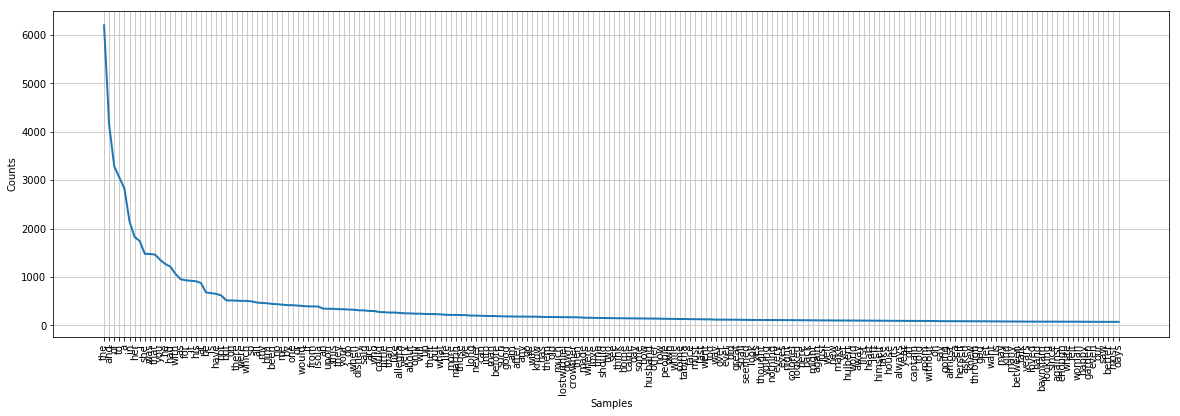

In [15]:
# plot the top 200
plt.figure(figsize=(20, 6))
plt.rc('xtick', labelsize=10) 
fd.plot(200)

### Plot of the Top Words with Stop Words in English Removed
One of the major forms of pre-processing is going to be filtering out useless data. In natural language processing, useless words (data), are referred to as stop words. We would not want these words taking up space in our database, or taking up valuable processing time.

In [16]:
nltk.download('stopwords')
stoplist = stopwords.words('english')
uwords = [w for w in words if w not in stoplist]
ufd = nltk.FreqDist(uwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ahsan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


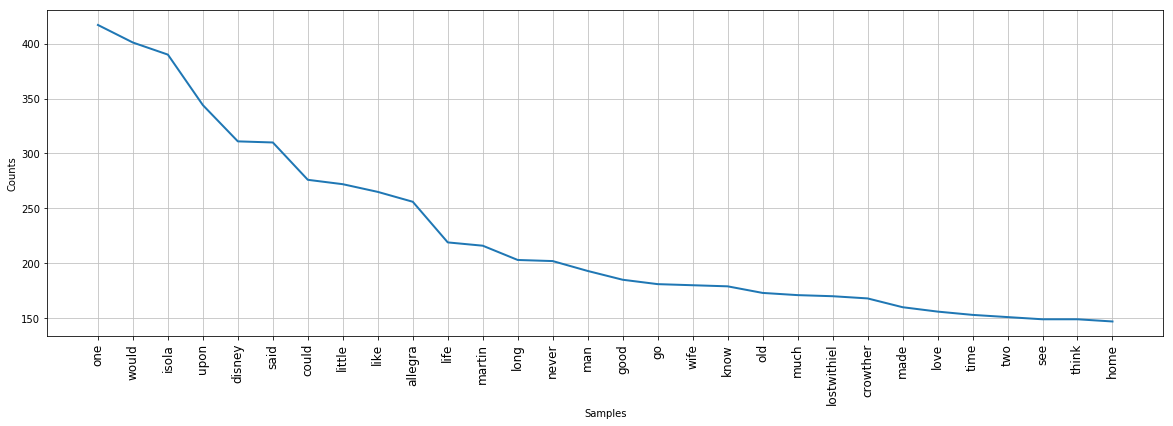

In [17]:
plt.figure(figsize=(20, 6))
plt.rc('xtick', labelsize=12) 
ufd.plot(30)

## 6. Testing Zipf's Law
To test if the observed relative frequency of these words follow Zipf’s law we have  plotted the frequency of the top 200 words on both normal and log scale. According to Zipf's Law, if the most common word occurs n times then the next most common word should occur n/2 times and so on. On a graph this would be a straight line.

We can see from the the graphs below that this is not the case with our normal scale graph. On the normal scale graph it appears that only the top few words follow Zipf's law, however the log scale graph resembles kind of a straight line and indicites the top 200 words follows trend Zipf's law.

### Normal Scale

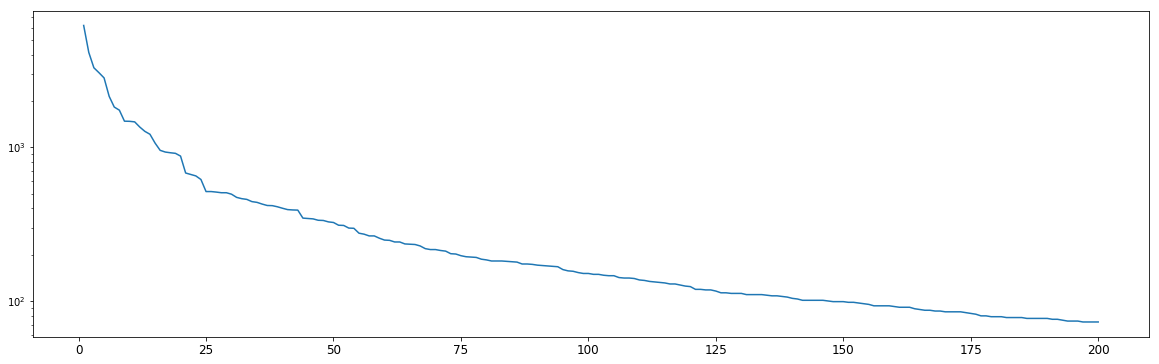

In [18]:
zl_words = top_words = fd.most_common(200)
x_vec = [i+1 for i in range(len(zl_words))]

y_vec = [freq for (word,freq) in zl_words]

plt.figure(1, figsize=(20,6))
plt.semilogy(x_vec, y_vec)

plt.show()

### Log Scale

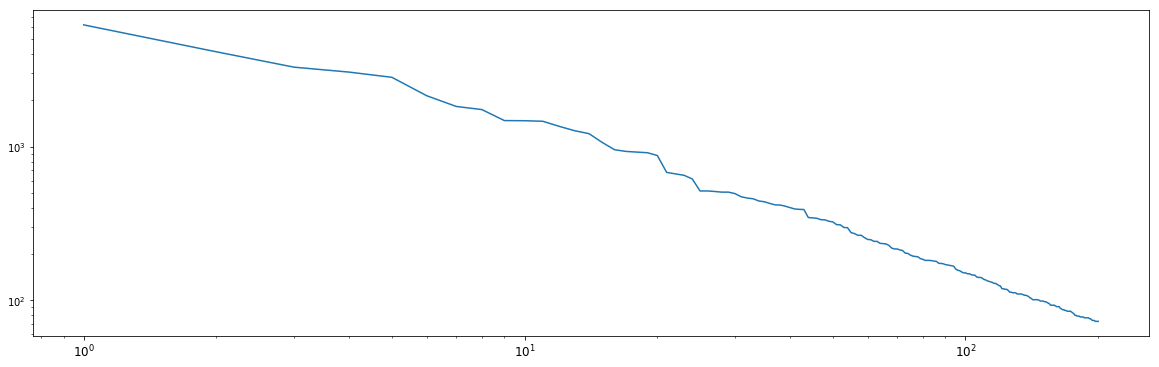

In [19]:
zl_words = top_words = fd.most_common(200)
x_vec = [i+1 for i in range(len(zl_words))]

y_vec = [freq for (word,freq) in zl_words]

plt.figure(1, figsize=(20,6))
plt.semilogy(x_vec, y_vec)

ax = plt.subplot(1,1,1)
ax.set_xscale('log')
ax.set_yscale('log')

plt.show()

## 7. How The Frequency Of The Words In This Corpus Differ From “all words in all corpora.”
Compared to all texts we think that this corpus uses the same “common” words as we would find across all corpus in the English language. However given our graph from testing Zipf’s Law, we see that the author uses the word “the” more often than one would expect and then uses the rest of his common vocabulary in similar sizes.